<a href="https://colab.research.google.com/github/LatiefDataVisionary/deep-learning-college-task/blob/main/tasks/src/yale_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Code Source**: https://www.kaggle.com/code/georgearnall/yale-face-recognition/notebook
- **Dataset Source**:
  - https://www.kaggle.com/datasets/olgabelitskaya/yale-face-database
  - https://vision.ucsd.edu/datasets/yale-face-database
- **Dataset in my GDrive**: https://drive.google.com/drive/folders/14DBT3MZ-3UXfF0Nl7letCQB301muGpKW?usp=sharing

## **1. Import Library**

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00


In [4]:
# Plotting and Image Display
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Numerical operations and Data Handling
import numpy as np
import pandas as pd

# Image Processing and Face Detection
import cv2
from PIL import Image
import mtcnn
from mtcnn.mtcnn import MTCNN

from google.colab import drive
drive.mount('/content/drive')

# File and Directory Operations
import os
from os import listdir
from tqdm import tqdm

# Machine Learning - Model Building, Evaluation, and Preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Deep Learning - TensorFlow/Keras
import random # Used in data augmentation and sample testing

from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, ZeroPadding2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers, constraints

Mounted at /content/drive


Berikut adalah penjelasan untuk setiap pustaka (library) dan modul yang diimpor di awal notebook ini, dikelompokkan berdasarkan fungsinya:

**Plotting and Image Display**
*   `from matplotlib import pyplot as plt`: Mengimpor modul `pyplot` dari pustaka `matplotlib` untuk membuat grafik dan menampilkan gambar. Diberi alias `plt`.
*   `from matplotlib.patches import Rectangle`: Mengimpor kelas `Rectangle` dari `matplotlib.patches` untuk menggambar bentuk persegi (kotak) pada gambar, berguna untuk menandai wajah.
*   `import seaborn as sns`: Mengimpor pustaka `seaborn` untuk membuat visualisasi data yang lebih menarik dan informatif.

**Numerical operations and Data Handling**
*   `import numpy as np`: Mengimpor pustaka `numpy` untuk operasi numerik tingkat tinggi, terutama pada array dan matriks. Diberi alias `np`.
*   `import pandas as pd`: Mengimpor pustaka `pandas` untuk struktur data dan alat analisis data yang efisien, seperti DataFrame. Diberi alias `pd`.

**Image Processing and Face Detection**
*   `import cv2`: Mengimpor pustaka OpenCV (Open Source Computer Vision Library) untuk berbagai tugas pemrosesan gambar dan video.
*   `from PIL import Image`: Mengimpor kelas `Image` dari pustaka PIL (Pillow) untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar.
*   `import mtcnn` dan `from mtcnn.mtcnn import MTCNN`: Mengimpor pustaka `mtcnn` dan kelas `MTCNN` spesifik di dalamnya, yang digunakan untuk deteksi wajah menggunakan metode Convolutional Neural Network (CNN).

**File and Directory Operations**
*   `import os` dan `from os import listdir`: Mengimpor pustaka `os` dan fungsi `listdir` untuk berinteraksi dengan sistem operasi, seperti mendapatkan daftar file dan direktori.
*   `from tqdm import tqdm`: Mengimpor fungsi `tqdm` untuk menampilkan progress bar saat melakukan iterasi atau loop yang memakan waktu.

**Machine Learning - Model Building, Evaluation, and Preprocessing**
*   `from sklearn.metrics import ...`: Mengimpor berbagai fungsi dari `sklearn.metrics` untuk mengevaluasi kinerja model, seperti `accuracy_score`, `classification_report`, `confusion_matrix`, dll.
*   `from sklearn.model_selection import train_test_split`: Mengimpor fungsi `train_test_split` dari `sklearn.model_selection` untuk membagi dataset menjadi set pelatihan dan pengujian.
*   `from sklearn.preprocessing import LabelEncoder, Normalizer`: Mengimpor alat preprocessing dari `sklearn.preprocessing` seperti `LabelEncoder` untuk mengubah label kategori menjadi angka, dan `Normalizer` untuk menormalisasi data.
*   `from sklearn.svm import SVC`: Mengimpor kelas `SVC` (Support Vector Classifier) dari `sklearn.svm` untuk membangun model SVM.
*   `from sklearn.ensemble import RandomForestClassifier`: Mengimpor kelas `RandomForestClassifier` dari `sklearn.ensemble` untuk membangun model Random Forest.

**Deep Learning - TensorFlow/Keras**
*   `import random`: Mengimpor pustaka `random` untuk menghasilkan angka acak, digunakan dalam augmentasi data atau pemilihan sampel acak.
*   `from tensorflow.keras import ...`: Mengimpor berbagai modul dan kelas dari TensorFlow/Keras untuk membangun, melatih, dan mengelola model jaringan saraf tiruan (CNN). Ini termasuk `optimizers`, `losses`, `callbacks` (seperti `EarlyStopping`), `utils` (`plot_model`), `preprocessing.image` (`ImageDataGenerator`), `models`, `layers` (seperti `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout`), dan `regularizers`.

Dengan mengimpor semua ini, kita memiliki semua alat yang diperlukan untuk melakukan seluruh alur kerja proyek pengenalan wajah ini, mulai dari memuat data hingga melatih model deep learning dan mengevaluasinya.


## **2. Exploratory Data Analysis**



Bagian ini bertujuan untuk memahami dataset Yale Face Database yang akan kita gunakan. Dataset ini terdiri dari 165 gambar skala abu-abu dari 15 orang yang berbeda. Setiap orang memiliki 11 gambar dengan ekspresi yang berbeda-beda.

*   Di sini, kita mendefinisikan variabel `DIRECTORY` yang berisi path atau lokasi folder tempat dataset Yale Face Database disimpan di Google Drive kita. Ini memudahkan kita untuk mengakses gambar-gambar dalam dataset.

In [ ]:
DIRECTORY = "/content/drive/MyDrive/Dataset/Yale Face Database"

Kode ini bertujuan untuk menampilkan contoh gambar dari dataset dan menunjukkan bagaimana gambar tersebut direpresentasikan sebagai angka (piksel).


(243, 320, 3)


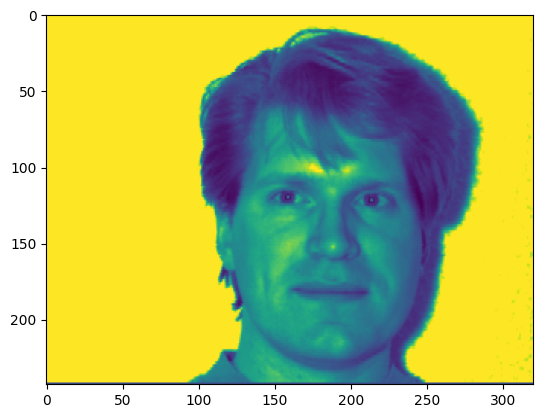

In [ ]:
filename = "/content/drive/MyDrive/Dataset/Yale Face Database/subject01.centerlight"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

### **2.1. Deteksi Wajah dengan MTCNN**

*   `filename = "/content/drive/MyDrive/Dataset/Yale Face Database/subject01.centerlight"`: Baris ini menentukan lokasi (path) dari salah satu file gambar di dataset yang akan kita gunakan, yaitu gambar subjek 01 dengan ekspresi "centerlight".
*   `pixels = plt.imread(filename)`: Baris ini membaca gambar dari lokasi yang ditentukan dan menyimpannya dalam variabel `pixels`. `pixels` sekarang berisi data angka yang merepresentasikan intensitas warna (karena ini gambar grayscale) dari setiap titik (piksel) pada gambar.
*   `rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)`: Karena MTCNN (algoritma deteksi wajah yang akan digunakan nanti) biasanya bekerja dengan gambar berwarna (RGB), baris ini membuat salinan dari data piksel grayscale sebanyak tiga kali dan menumpuknya menjadi satu array baru. Hasilnya adalah representasi gambar yang seolah-olah berwarna (memiliki 3 channel), meskipun sebenarnya ketiga channel tersebut berisi data yang sama dari gambar grayscale asli.
*   `print(rgb_pixels.shape)`: Baris ini mencetak bentuk (shape) dari array `rgb_pixels`. Bentuk ini menunjukkan dimensi gambar dalam format (tinggi, lebar, channel). Output `(243, 320, 3)` berarti gambar memiliki tinggi 243 piksel, lebar 320 piksel, dan 3 channel warna (RGB).
*   `plt.imshow(pixels)`: Baris ini menyiapkan gambar grayscale (`pixels`) untuk ditampilkan menggunakan `matplotlib`.
*   `plt.show()`: Baris ini menampilkan gambar yang sudah disiapkan.

Jadi, secara keseluruhan, kode ini memuat gambar grayscale, mengubahnya menjadi format "seolah-olah" RGB untuk kompatibilitas dengan alat berikutnya, mencetak dimensinya, dan kemudian menampilkannya.

Pada setiap gambar, wajah ditempatkan di wilayah yang berbeda. Tugas pertama adalah menormalisasi semua posisi wajah sehingga dapat diumpankan dengan andal ke dalam pengklasifikasi. Ada beberapa teknik untuk mencapai ini. Haar Cascades menyediakan metode yang sederhana dan cepat untuk mendeteksi wajah, tetapi mereka bisa tidak dapat diandalkan. Mereka sangat cocok untuk deteksi waktu nyata. Identifikasi wajah dapat menghabiskan waktu lebih lama untuk memproses gambar. Oleh karena itu, kita akan menggunakan MTCNN yang merupakan algoritma pendeteksi wajah menggunakan CNN, algoritma ini mencapai akurasi yang jauh lebih tinggi daripada teknik lainnya.

Kode ini menggunakan pustaka MTCNN yang sebelumnya telah diimpor untuk mendeteksi wajah dalam gambar.


In [ ]:
# Create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(rgb_pixels)
results

[{'box': [120, 61, 126, 163],
  'confidence': np.float64(0.9988357424736023),
  'keypoints': {'nose': [np.int64(187), np.int64(150)],
   'mouth_right': [np.int64(211), np.int64(185)],
   'right_eye': [np.int64(213), np.int64(121)],
   'left_eye': [np.int64(157), np.int64(120)],
   'mouth_left': [np.int64(162), np.int64(183)]}}]

*   `detector = MTCNN()`: Baris ini membuat objek `detector` dari kelas `MTCNN`. Objek ini akan digunakan untuk melakukan deteksi wajah. MTCNN menggunakan *default weights* (pengaturan bawaan) yang sudah dilatih sebelumnya.
*   `results = detector.detect_faces(rgb_pixels)`: Baris ini memanggil metode `detect_faces` pada objek `detector`, dengan memasukkan data gambar `rgb_pixels` sebagai input. Fungsi ini akan memproses gambar dan mencari lokasi wajah di dalamnya. Hasil deteksi disimpan dalam variabel `results`.
*   `results`: Baris ini mencetak isi dari variabel `results`.

**Penjelasan Output:**

Output dari sel kode ini adalah daftar (list) kamus (dictionary). Setiap kamus dalam daftar ini mewakili satu wajah yang terdeteksi dan berisi informasi seperti:

*   `'box'`: Koordinat persegi panjang yang mengelilingi wajah dalam format `[x, y, lebar, tinggi]`. `x` dan `y` adalah koordinat sudut kiri atas kotak pembatas.
*   `'confidence'`: Tingkat keyakinan (probabilitas) bahwa area tersebut memang wajah, dalam skala 0 hingga 1. Nilai yang lebih tinggi menunjukkan keyakinan yang lebih tinggi.
*   `'keypoints'`: Lokasi titik-titik penting pada wajah seperti mata (`left_eye`, `right_eye`), hidung (`nose`), dan mulut (`mouth_left`, `mouth_right`). Koordinat keypoint ini juga dalam format `[x, y]`.



Kode ini mendefinisikan sebuah fungsi bernama `draw_image_with_boxes` yang bertujuan untuk menggambar kotak pembatas di sekitar wajah yang terdeteksi pada sebuah gambar. Kemudian, kode ini memanggil fungsi tersebut untuk menampilkan gambar asli dengan kotak-kotak yang menandai lokasi wajah.


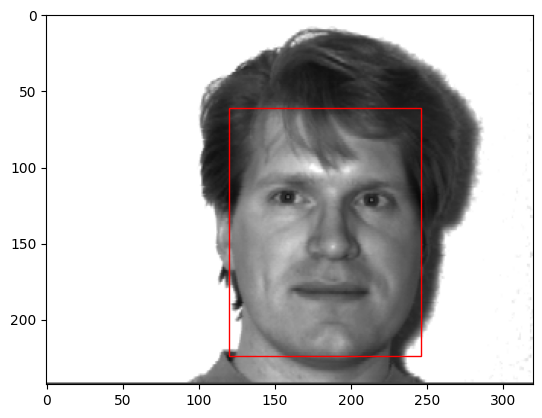

In [ ]:
# draw an image with detected objects
def draw_image_with_boxes(data, result_list):
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

# display faces on the original image
draw_image_with_boxes(rgb_pixels, results)

Berikut rinciannya:

*   `def draw_image_with_boxes(data, result_list):`: Baris ini mendefinisikan fungsi `draw_image_with_boxes` yang menerima dua argumen: `data` (data piksel gambar) dan `result_list` (daftar hasil deteksi wajah dari MTCNN).
*   `plt.imshow(data)`: Di dalam fungsi, baris ini menampilkan gambar asli menggunakan `matplotlib`.
*   `ax = plt.gca()`: Baris ini mendapatkan objek "axes" (sumbu) dari plot saat ini, yang diperlukan untuk menambahkan elemen grafis seperti persegi panjang.
*   `for result in result_list:`: Baris ini memulai perulangan (loop) untuk memproses setiap hasil deteksi wajah dalam `result_list`.
*   `x, y, width, height = result['box']`: Di setiap perulangan, baris ini mengambil koordinat kotak pembatas (`x`, `y`, `width`, `height`) dari kamus `result`.
*   `rect = Rectangle((x, y), width, height, fill=False, color='red')`: Baris ini membuat objek `Rectangle` (persegi panjang) dengan sudut kiri atas di `(x, y)`, lebar `width`, dan tinggi `height`. `fill=False` berarti persegi panjang hanya berupa garis tepi, dan `color='red'` mengatur warna garis menjadi merah.
*   `ax.add_patch(rect)`: Baris ini menambahkan objek persegi panjang (`rect`) ke plot gambar.
*   `plt.show()`: Setelah perulangan selesai (semua kotak digambar), baris ini menampilkan plot gambar yang sudah dilengkapi dengan kotak pembatas wajah.
*   `draw_image_with_boxes(rgb_pixels, results)`: Baris ini memanggil fungsi `draw_image_with_boxes` dengan menggunakan data gambar `rgb_pixels` dan hasil deteksi wajah `results` yang diperoleh dari sel sebelumnya.

**Penjelasan Output:**

Output dari sel kode ini adalah tampilan gambar yang sudah Anda lihat sebelumnya, tetapi sekarang dengan tambahan kotak berwarna merah yang digambar di sekeliling setiap wajah yang berhasil dideteksi oleh algoritma MTCNN. Ini adalah visualisasi dari hasil deteksi wajah.

### **2.2. Ekstraksi Wajah**

Kode ini mendefinisikan dua fungsi: `extract_face_from_file` dan `extract_face`. Tujuan utama dari fungsi-fungsi ini adalah untuk mengekstrak area wajah dari sebuah gambar dan mengubah ukurannya menjadi ukuran yang seragam (160x160 piksel) dalam format grayscale.


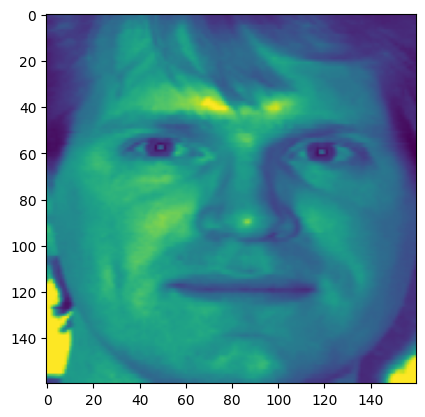

In [ ]:
# extract a single face from a given photograph
def extract_face_from_file(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)

    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)

    return gray_face


# Create the detector, using default weights
detector = MTCNN()

# load the photo and extract the face
face_pixels = extract_face_from_file("/content/drive/MyDrive/Dataset/Yale Face Database/subject01.centerlight")

plt.imshow(face_pixels)

Berikut rinciannya:

**Fungsi `extract_face_from_file(filename, required_size=(160, 160))`:**

*   Fungsi ini mengambil nama file gambar (`filename`) dan ukuran yang diinginkan untuk wajah yang diekstrak (`required_size`) sebagai input.
*   `image = Image.open(filename)`: Baris ini membuka file gambar dari lokasi yang ditentukan menggunakan pustaka PIL (Pillow).
*   `return extract_face(image, required_size)`: Baris ini memanggil fungsi `extract_face` (yang dijelaskan di bawah) dengan gambar yang baru saja dimuat dan ukuran yang diinginkan, lalu mengembalikan hasilnya.

**Fungsi `extract_face(image, required_size=(160, 160))`:**

*   Fungsi ini mengambil objek gambar PIL (`image`) dan ukuran yang diinginkan (`required_size`) sebagai input.
*   `image = image.convert('RGB')`: Mengubah gambar menjadi format warna RGB jika belum dalam format tersebut. Ini penting karena MTCNN biasanya bekerja dengan gambar berwarna.
*   `pixels = np.asarray(image)`: Mengubah objek gambar PIL menjadi array NumPy, yang berisi data piksel gambar.
*   `results = detector.detect_faces(pixels)`: Menggunakan objek `detector` MTCNN yang sudah dibuat sebelumnya untuk mendeteksi wajah dalam array piksel.
*   `x1, y1, width, height = results[0]['box']`: Mengambil koordinat kotak pembatas wajah yang pertama kali terdeteksi. `results[0]` mengasumsikan hanya ada satu wajah yang terdeteksi di gambar, yang sesuai dengan dataset Yale Face Database.
*   `x1, y1 = abs(x1), abs(y1)`: Baris ini adalah perbaikan bug untuk memastikan koordinat x1 dan y1 tidak negatif.
*   `x2, y2 = x1 + width, y1 + height`: Menghitung koordinat sudut kanan bawah kotak pembatas.
*   `face = pixels[y1:y2, x1:x2]`: Mengekstrak area wajah dari array piksel berdasarkan koordinat kotak pembatas.
*   `image = Image.fromarray(face)`: Mengubah kembali array piksel wajah yang diekstrak menjadi objek gambar PIL.
*   `image = image.resize(required_size)`: Mengubah ukuran gambar wajah menjadi ukuran yang ditentukan (`required_size`, default 160x160).
*   `face_array = np.asarray(image)`: Mengubah kembali gambar wajah yang sudah diubah ukurannya menjadi array NumPy.
*   `gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)`: Mengubah gambar wajah (yang mungkin masih dalam format "seolah-olah" RGB dari langkah sebelumnya atau asli berwarna) menjadi format grayscale menggunakan OpenCV.

Setelah definisi fungsi, kode ini melakukan hal berikut:

*   `detector = MTCNN()`: Membuat objek `detector` MTCNN baru.
*   `face_pixels = extract_face_from_file("/content/drive/MyDrive/Dataset/Yale Face Database/subject01.centerlight")`: Memanggil fungsi `extract_face_from_file` untuk memuat gambar contoh (`subject01.centerlight`), mendeteksi wajah di dalamnya, mengekstrak wajah tersebut, mengubah ukurannya, mengubahnya menjadi grayscale, dan menyimpan hasilnya dalam variabel `face_pixels`.
*   `plt.imshow(face_pixels)`: Menyiapkan gambar wajah yang sudah diekstrak (`face_pixels`) untuk ditampilkan.

**Penjelasan Output:**

Output dari sel kode ini adalah tampilan gambar wajah yang sudah diekstrak dan diubah ukurannya menjadi 160x160 piksel dalam format grayscale. Output teks seperti `<matplotlib.image.AxesImage...` adalah representasi internal dari objek plot, bukan data gambar itu sendiri. Gambar visualnya akan muncul di output sel.

## **3. Building the dataset**

Bagian ini bertujuan untuk membangun dataset yang akan kita gunakan untuk melatih model. Langkah utamanya adalah mengekstrak wajah dari semua gambar di dataset Yale Face Database dan menyiapkannya dalam format yang sesuai.

Sel ini mendefinisikan fungsi bantu `list_files` yang akan digunakan untuk mendapatkan daftar file di dalam sebuah direktori yang mengandung string tertentu.

In [ ]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

Kode ini mencoba untuk memuat dan menampilkan 16 gambar wajah pertama dari dataset yang diekstrak menggunakan fungsi `extract_face_from_file`. Ini bertujuan untuk memvisualisasikan beberapa contoh wajah yang sudah diekstraksi sebelum memproses seluruh dataset.

100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


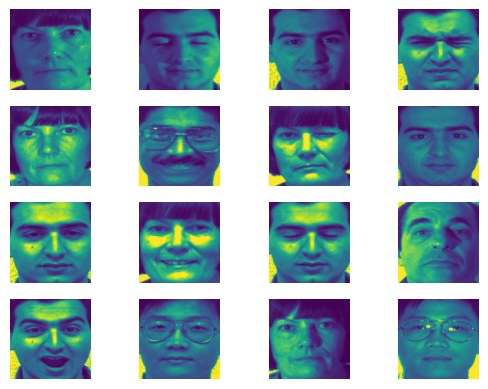

In [ ]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY, "subject")[0:16]):
    # path
    path = DIRECTORY + "/" + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

## **4. Setup the test train data**

Bagian ini menyiapkan data untuk dibagi menjadi set pelatihan (training set) dan set pengujian (testing set).

Kode ini memuat daftar nama file, memisahkannya untuk mendapatkan subjek dan kategori (ekspresi/kondisi gambar), dan menyiapkannya dalam bentuk DataFrame. Ini membantu dalam mengorganisir data berdasarkan subjek untuk pembagian dataset nantinya.

In [ ]:
# list filenames
filenames = pd.DataFrame(list_files(DIRECTORY, "subject"))

# generate split
df = filenames[0].str.split(".", expand=True)
df["filename"] = filenames

# # tidy columns
df = df.rename(columns = {0:"subject", 1:"category"})
df['subject'] = df.subject.str.replace('subject' , '')
df.apply(pd.to_numeric, errors='coerce').dropna()
df['subject'] = pd.to_numeric(df["subject"])
df

,subject,category,filename
0,11,rightlight,subject11.rightlight
1,15,rightlight,subject15.rightlight
2,15,leftlight,subject15.leftlight
3,15,wink,subject15.wink
4,11,centerlight,subject11.centerlight
...,...,...,...
160,1,wink,subject01.wink
161,1,sleepy,subject01.sleepy
162,1,noglasses,subject01.noglasses
163,2,happy,subject02.happy


Kode ini mencetak daftar subjek unik yang ada dalam dataset setelah diproses pada sel sebelumnya. Ini memberikan gambaran tentang jumlah kelas (orang) yang berbeda dalam dataset.

In [ ]:
# Print classnames
df['subject'].unique()

array([11, 15, 13, 12, 14, 10,  9,  5,  6,  8,  7,  4,  3,  2,  1])

## **5. Test Train Split**

Ada jumlah sampel yang terbatas per kelas, meskipun kita membutuhkan jumlah kelas yang sesuai untuk mengukur kinerja model dengan tepat. Saya memutuskan pembagian latih uji sekitar ~70/30 (cukup untuk 3 gambar uji).

Kode ini menghitung ukuran set pengujian berdasarkan jumlah gambar per kelas yang diinginkan dan jumlah kelas total, lalu membagi data menjadi set pelatihan (train) dan pengujian (test) menggunakan `train_test_split` dari scikit-learn. Pembagian dilakukan dengan stratifikasi (`stratify=y`) untuk memastikan setiap kelas terwakili secara proporsional di kedua set.

In [ ]:
PER_CLASS = 8 # 11 images (3 test & 8 train)
NO_CLASSES = 15
DS_SIZE = df["subject"].count()
TEST_SIZE = 1 - (PER_CLASS * NO_CLASSES / DS_SIZE)

# # list files for each group
# # df.groupby(['subject'])['filename'].apply(list)
y = df['subject']
X = df.drop('subject',axis=1)

# # subject
X_train_info, X_test_info, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=45, stratify=y)

y_train = y_train.tolist()
y_test = y_test.tolist()

## **6. Extract the faces**

Bagian ini mendefinisikan fungsi untuk memuat dataset dan mengekstrak wajah dari semua gambar yang sudah dibagi menjadi set pelatihan dan pengujian.

Kode ini mendefinisikan ulang objek `detector` MTCNN dan mendefinisikan fungsi `load_dataset`. Fungsi `load_dataset` ini akan mengiterasi melalui daftar nama file gambar, memanggil fungsi `extract_face_from_file` untuk setiap file untuk mendapatkan gambar wajah yang sudah diekstrak dan diproses (grayscale, ukuran 160x160), dan mengembalikan hasilnya sebagai array NumPy.

In [ ]:
detector = MTCNN()

def load_dataset(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY + "/" + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

Kode ini memanggil fungsi `load_dataset` untuk memproses set pengujian (`X_test_info`) dan set pelatihan (`X_train_info`) untuk mengekstrak wajah dari semua gambar di kedua set tersebut. Hasilnya disimpan dalam variabel `X_test` dan `X_train`. Kemudian, kode ini mencetak bentuk (shape) dari array `X_test` dan `X_train` untuk menunjukkan dimensi data wajah yang sudah diekstrak (jumlah gambar, tinggi, lebar).

In [ ]:
X_test = load_dataset(X_test_info)
X_train = load_dataset(X_train_info)

print(X_test.shape)
print(X_train.shape)

100%|██████████| 120/120 [00:27<00:00,  4.38it/s]

(45, 160, 160)
(120, 160, 160)


## **7.  Train the SVM Model**

An SVM model gives us a good baseline as to the performance of the dataset that we can expect

In [ ]:
# Normalize input vectors
in_encoder = Normalizer(norm='l2')

X_train_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
print('Reshaped X_train', X_train_reshaped.shape)
X_train_reshaped = in_encoder.transform(X_train_reshaped)

X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print('Reshaped X_test', X_test_reshaped.shape)
X_test_reshaped = in_encoder.transform(X_test_reshaped)

# Label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(y_train)

# Fit model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_reshaped, y_train)

# Predict
yhat_train = model.predict(X_train_reshaped)
yhat_test = model.predict(X_test_reshaped)

# Score
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)
# Summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Reshaped X_train (120, 25600)
Reshaped X_test (45, 25600)
Accuracy: train=91.667, test=64.444


In [ ]:
svm_predictions = model.predict(X_test_reshaped)
print(classification_report(y_test,svm_predictions))

# Display the confusion matrix:
# [TP,FP]
print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.20      0.33      0.25         3
           3       0.22      0.67      0.33         3
           4       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      0.33      0.50         3
           9       1.00      0.67      0.80         3
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      0.67      0.80         3
          14       0.40      0.67      0.50         3
          15       0.00      0.00      0.00         3

    accuracy                           0.64        45
   macro avg       0.77      0.64      0.67        45
weighted avg       0.77   

The result achieves 75% accuracy on the test set which is a fairly good result, testing other models will give us a better benchmark.

## **8. Random Sample testing**

Predicted: 11 (2.908)
Expected: 11


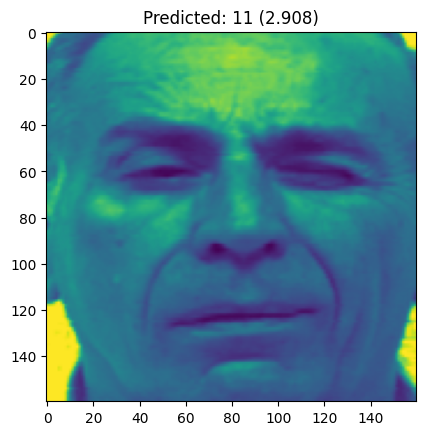

In [ ]:
# Test model on a random example from the test dataset
selection = random.randint(1, X_test.shape[0])
random_face_emb = X_test_reshaped[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform([random_face_class]) - 1

# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]

class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class) - 1
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# Show the image
plt.imshow(X_train[selection])
title = 'Predicted: %s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

## **9. Testing Random Forrest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_reshaped, y_train)

RandomForestClassifier()

In [ ]:
rf_predictions = rfc.predict(X_test_reshaped)
print(classification_report(y_test,rf_predictions))

# Display the confusion matrix:
# [TP,FP]
print("Confusion Matrix:")
print(confusion_matrix(y_test,rf_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         3
           5       0.60      1.00      0.75         3
           6       0.50      0.67      0.57         3
           7       1.00      1.00      1.00         3
           8       1.00      0.33      0.50         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      0.67      0.80         3
          14       0.67      0.67      0.67         3
          15       0.67      0.67      0.67         3

    accuracy                           0.78        45
   macro avg       0.82      0.78      0.77        45
weighted avg       0.82   

In [ ]:
y_test

[15,
 9,
 2,
 7,
 3,
 4,
 15,
 3,
 7,
 10,
 12,
 5,
 10,
 11,
 11,
 12,
 1,
 9,
 14,
 12,
 2,
 5,
 2,
 4,
 6,
 8,
 13,
 9,
 15,
 8,
 3,
 14,
 4,
 10,
 6,
 13,
 14,
 11,
 5,
 7,
 6,
 13,
 1,
 8,
 1]

Predicted: 7 (0.000)
Expected: 7


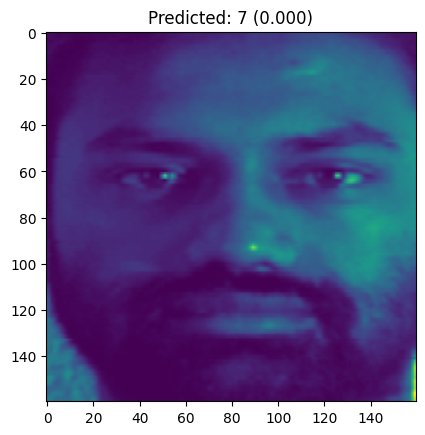

In [ ]:
# Test model on a random example from the test dataset
selection = random.randint(1, X_test.shape[0])
random_face_emb = X_test_reshaped[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform([random_face_class]) - 1

# Prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = rfc.predict(samples)
yhat_prob = rfc.predict_proba(samples)

# Get name
class_index = yhat_class[0]

# Calculate results
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class) - 1
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# Show the image
plt.imshow(X_test[selection])
title = 'Predicted: %s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

## **10. Training a Convolutional Neural Network**

In [ ]:
# Options

TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 15
EPOCHS = 25
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 120
NUMBER_OF_TESTING_IMAGES = 45
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

### Save the dataset to disk to load into keras

Keras has built in features to load data from disk, so we will save the dataset.

In [ ]:
def save_keras_dataset(setname, dataset, labels, per_class):
    # combine labels and images to generate files
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    # Save images
    j = 0
    for label, gray_img in tqdm(data):
        j = (j% per_class) + 1
        # Create directory
        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [ ]:
y_train

[10,
 13,
 1,
 12,
 11,
 9,
 12,
 15,
 6,
 6,
 10,
 1,
 6,
 5,
 1,
 15,
 3,
 2,
 10,
 1,
 10,
 14,
 7,
 2,
 7,
 10,
 10,
 10,
 4,
 3,
 4,
 12,
 4,
 2,
 3,
 14,
 7,
 1,
 5,
 8,
 13,
 3,
 8,
 5,
 3,
 2,
 9,
 4,
 9,
 1,
 6,
 9,
 15,
 15,
 3,
 8,
 7,
 4,
 5,
 6,
 14,
 11,
 6,
 7,
 7,
 13,
 1,
 14,
 12,
 8,
 15,
 7,
 2,
 11,
 11,
 3,
 14,
 9,
 4,
 2,
 6,
 13,
 9,
 11,
 13,
 14,
 5,
 8,
 15,
 1,
 6,
 5,
 13,
 15,
 15,
 14,
 8,
 9,
 4,
 8,
 10,
 2,
 11,
 13,
 12,
 4,
 12,
 7,
 3,
 14,
 5,
 8,
 13,
 12,
 11,
 2,
 5,
 12,
 9,
 11]

In [ ]:
# clear directory if it already exists
import shutil
shutil.rmtree(r'data', ignore_errors=True)

# Save datasets
save_keras_dataset("test", X_test, y_test, 3)
save_keras_dataset("train", X_train, y_train, 8)

100%|██████████| 120/120 [00:00<00:00, 1495.99it/s]


## **11. Configure data generators with random gaussian noise, zooming and rotation**

Keras includes an ImageDataGenerator which can automatically augment the dataset.

In [ ]:
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,
        # horizontal_flip=True,
#         fill_mode="nearest",
#         zoom_range=0.1,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         rotation_range=10,
        # preprocessing_function=add_noise
    )

def add_noise(img):
    """Add random noise to an image"""
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
# Setup Data Generators
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False # IMPORTANT: to ensure classes line up with batches
)

Found 120 images belonging to 15 classes.
Found 45 images belonging to 15 classes.
Found 45 images belonging to 15 classes.


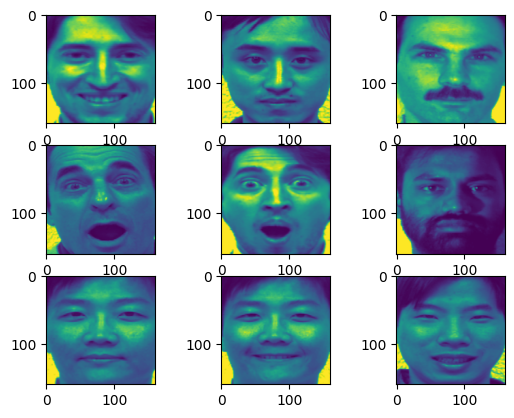

In [ ]:
sample_images = testing_generator.__next__()[0]

f, xyarr = plt.subplots(3,3)
xyarr[0,0].imshow(sample_images[0])
xyarr[0,1].imshow(sample_images[1])
xyarr[0,2].imshow(sample_images[2])
xyarr[1,0].imshow(sample_images[3])
xyarr[1,1].imshow(sample_images[4])
xyarr[1,2].imshow(sample_images[5])
xyarr[2,0].imshow(sample_images[6])
xyarr[2,1].imshow(sample_images[7])
xyarr[2,2].imshow(sample_images[8])
plt.show()

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
# Define a sequential keras model
model = models.Sequential()

# 1st Convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

# 2nd Convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the Convolution
model.add(Flatten())

# Define a dense layer with l2 regularizer to reduce overfitting
model.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))

# Define a drop layer to reduce overfitting
model.add(MCDropout(rate=0.5))

# Final output layer
model.add(Dense(NUM_CLASSES, activation='softmax', kernel_initializer="glorot_uniform"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 78, 78, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 39, 39, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,334,543 (81.38 MB)

 Trainable params: 21,334,543 (81.38 MB)

 Non-trainable params: 0 (0.00 B)

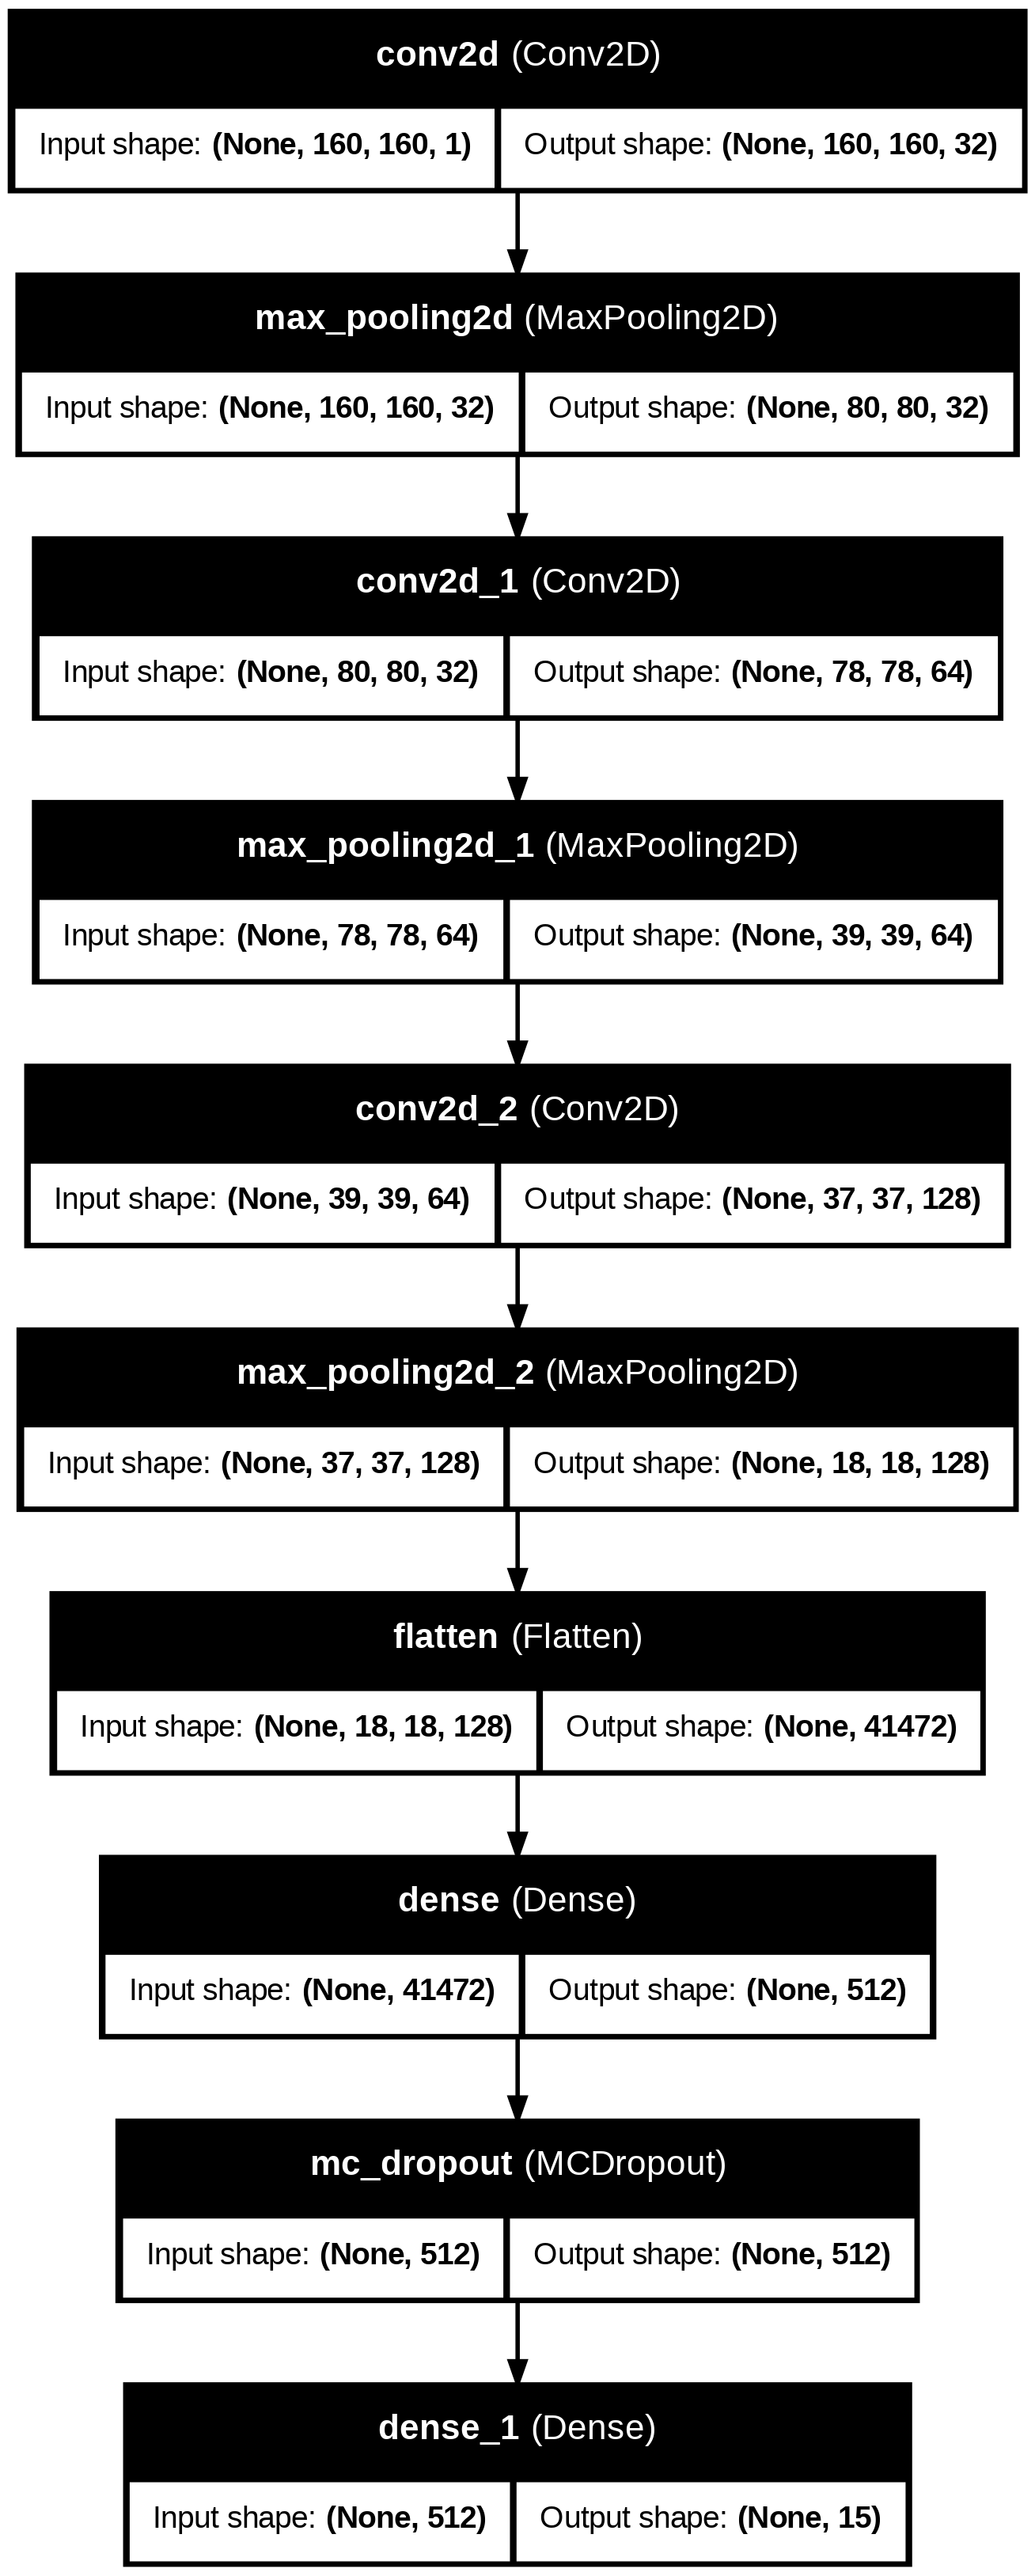

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
early_stopping = EarlyStopping()

model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.0003),
    metrics=["accuracy"]
)

history = model.fit(
    training_generator,
    steps_per_epoch=(NUMBER_OF_TRAINING_IMAGES//BATCH_SIZE ),
    epochs=EPOCHS,
    validation_data=testing_generator,
    shuffle=True,
    validation_steps=(NUMBER_OF_TESTING_IMAGES//BATCH_SIZE),
#     callbacks=[early_stopping]
)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0131 - loss: 13.5472

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.0136 - loss: 13.4562 - val_accuracy: 0.1111 - val_loss: 11.0419
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.1405 - loss: 10.4160 - val_accuracy: 0.2000 - val_loss: 8.6605
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2919 - loss: 8.1807 - val_accuracy: 0.1778 - val_loss: 6.9661
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2407 - loss: 6.5291 - val_accuracy: 0.2889 - val_loss: 5.5807
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3061 - loss: 5.3895 - val_accuracy: 0.3111 - val_loss: 4.7289
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5035 - loss: 4.3595 - val_accuracy: 0.3333 - val_loss: 4.2253
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5275 - loss: 3.6967 - val_accuracy: 0.4444 - val_loss: 3.6300
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5535 - loss: 3.2301 - val_accuracy: 0.6222 - val_loss: 3.1601
Epoch 9/25
6/6 ━

## **12. CNN Model Evaluation**

After training, we can evaluate the model to test its accuracy.

We need to test for overfitting which occurs when the accuracy of the training set is sigificantly higher than the testing set due to the loss function.

Implementing l2 regularization attempts to reduce overfitting by penalizing large weights in the network. Due to the small size of the dataset, there has to be a trade off between overfitting and accuracy.

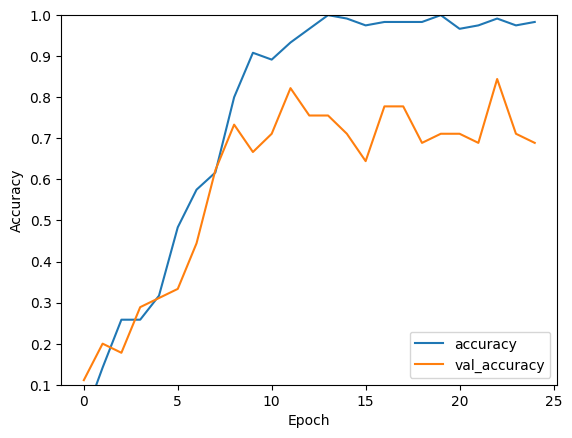

In [ ]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

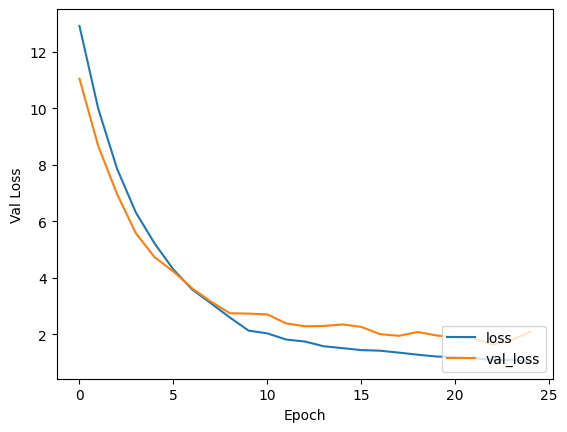

In [ ]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

In [ ]:
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred))
print(validation_generator.classes)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       0.25      0.67      0.36         3
           7       1.00      0.67      0.80         3
           8       0.40      0.67      0.50         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      0.33      0.50         3
          13       1.00      0.33      0.50         3
          14       0.60      1.00      0.75         3

    accuracy                           0.73        45
   macro avg       0.87      0.73      0.

## **13. Save the model**

The model can be saved for future processing

In [ ]:
MODEL_NAME = "keras_face_recognition.h5"
model_path = "./model"
if not os.path.exists(model_path):
    os.mkdir(model_path)

model.save(os.path.join(model_path, MODEL_NAME))
class_names = training_generator.class_indices
class_names_file_reverse = MODEL_NAME[:-3] + "_class_names_reverse.npy"
class_names_file = MODEL_NAME[:-3] + "_class_names.npy"
np.save(os.path.join(model_path, class_names_file_reverse), class_names)
class_names_reversed = np.load(os.path.join(model_path, class_names_file_reverse), allow_pickle=True).item()
class_names = dict([(value, key) for key, value in class_names_reversed.items()])
np.save(os.path.join(model_path, class_names_file), class_names)

## **14. Sample Testing**

In [ ]:
def get_sample_test_image():
    """Chooses a random image from the testing set"""

    # Choose image sample
    expected_class = random.randint(1, NUM_CLASSES)
    random_sample = random.randint(1, 3)

    # Build image path
    image_path = f"data/train/class_{expected_class}/class_{expected_class}_{random_sample}.png"

    # Read the file
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Return the results
    return img, expected_class

In [ ]:
def preprocess_image(img):
    """Ensures the image is the correct shape and normalises the pixels"""

    image = Image.fromarray(img)
    image = image.resize((160,160))
    face_array = np.asarray(image)
    # expands the dimensions
    face_array = face_array.reshape(160,160,1)

    face_array = face_array.astype('float32')
    scaled_image = np.expand_dims(face_array, axis=0)

    return scaled_image

In [ ]:
def prediction(image, debug=True):
    # show the image
    plt.imshow(image)
    plt.show()

    # Process the sample
    input_sample = preprocess_image(img)

    # Prediction
    results = model.predict(input_sample)
    result = np.argmax(results, axis=1)
    index = result[0]

    # Calculate Confidence
    confidence = results[0][index] * 100
    classes = np.load(os.path.join("model", class_names_file), allow_pickle=True).item()
    # Get class name
    if type(classes) is dict:
        for k, v in classes.items():
            if k == index:
                class_name = v
    if debug:
        print(results)
        print("Detected class is {} with {:.2f}% confidence".format(class_name, round(confidence, 2)))

    # Return results
    return class_name, confidence

Expected class: 7


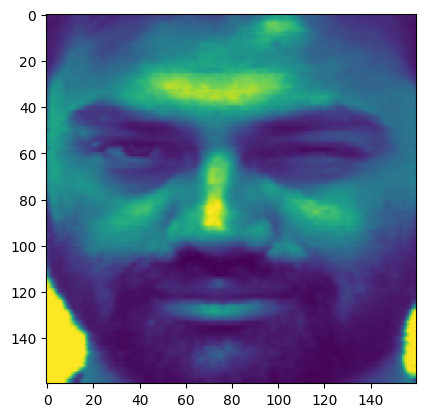

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Detected class is class_7 with 100.00% confidence


(('class_7', np.float32(100.0)), 'expected:7')

In [ ]:
# Choose an image
img, expected_class = get_sample_test_image()

print(f"Expected class: {expected_class}")

prediction(img), f"expected:{expected_class}"

## **15. Monte Carlo Dropout**

In [ ]:
def monte_carlo_prediction(image, debug=True):
    # show the image
    plt.imshow(image)
    plt.show()

    # Process the sample
    input_sample = preprocess_image(img)

    # Prediction
    results = np.stack([model(input_sample, training=True) for _ in range(100)])

    # Calucate Results
    results_mean = results.mean(axis=0)
    results_std = results.std(axis=0)
    index = np.argmax(results_mean,axis=1)

    # Calculate Confidence
    confidence = results_mean[0][index][0] * 100

    classes = np.load(os.path.join("model", class_names_file), allow_pickle=True).item()
    if type(classes) is dict:
        for k, v in classes.items():
            if k == index:
                class_name = v

    if (debug):
        print(f'Mean = {np.round(results_mean[:1],2)}')
        print(f'Std  = {np.round(results_std[:1],2)}')
        print(confidence)
        print("detected class is {} with {:.2f}% confidence".format(class_name, round(confidence, 2)))

    return class_name, confidence

expected class 8


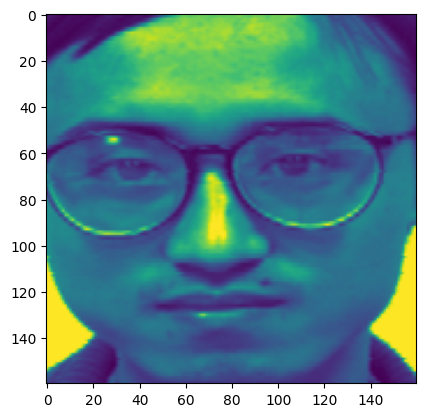

Mean = [[0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.99
  0.  ]]
Std  = [[0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.1 0. ]]
99.0
detected class is class_8 with 99.00% confidence


('class_8', np.float32(99.0))

In [ ]:
# Choose an image
img, expected_class = get_sample_test_image()
print(f"expected class {expected_class}")

monte_carlo_prediction(img)

## **16. Creating the authentication mechanism**

We can filter against this by ensuring that a person is not allowed into the building if the classification is below a certain threshold.

In [ ]:
THRESHOLD = 80

ALLOWED_USERS = ["class_01", "class_03", "class_05", "class_07", "class_09", "class_11", "class_13", "class_15"]

def authenticate(img, debug=False):
    classname, confidence = monte_carlo_prediction(img, debug)

    if (confidence < THRESHOLD):
        # Not authenticated
        print("Face not recognised")
    elif (classname in ALLOWED_USERS):
        print("Welcome {}".format(classname))
    else:
        print("You are not permitted {}".format(classname))

    return classname, confidence

expected class 7


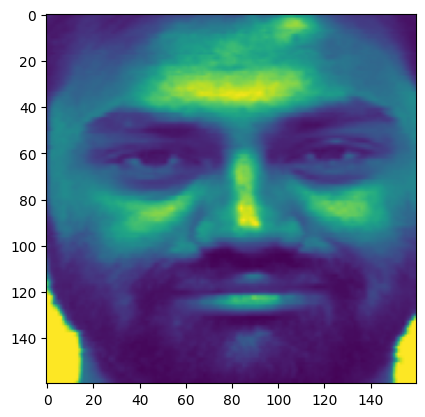

You are not permitted class_7


('class_7', np.float32(97.00419))

In [ ]:
img, expected_class = get_sample_test_image()
print(f"expected class {expected_class}")

authenticate(img)